In [1]:
# Data manipulation and visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import pairplot

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

In [2]:
import pandas as pd

file_path = "C:/Users/Chandra Shekhar/Downloads/globalterrorismdb_0718dist.csv"
df = pd.read_csv(file_path, encoding='latin1', low_memory=False)
df.shape


(181691, 135)

In [38]:
print(df.shape) 
print(df.head())

(181691, 135)
        eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region  ... addnotes scite1 scite2  scite3  dbsource  \
0  Dominican Republic       2  ...      NaN    NaN    NaN     NaN      PGIS   
1              Mexico       1  ...      NaN    NaN    NaN     NaN      PGIS   
2         Philippines       5  ...      NaN    NaN    NaN     NaN      PGIS   
3              Greece       8  ...      NaN    NaN    NaN     NaN      PGIS   
4               Japan       4  ...      NaN    NaN    NaN     NaN      PGIS   

   INT_LOG  INT_IDEO INT

In [3]:
##DATA CLEANING

In [4]:
import pandas as pd

data = df[[
    # Time
    'iyear',           
    'imonth',          
    'iday',            

    # Geospatial
    'latitude',        
    'longitude',       

    # Numerical
    'nperps',          
    'nkill',           
    'nwound',          
    'nkillter',        
    'propextent',      
    'ransomamt',       

    # Binary
    'doubtterr',       
    'vicinity',        
    'ishostkid',       
    'extended',        

    # Categorical
    'city',            
    'country',         
    'region',          
    'country_txt',     
    'region_txt',      
    'attacktype1_txt', 
    'weaptype1_txt',   
    'targtype1_txt',   

    # Text
    'gname'            
]]


In [5]:
#Data Renaming
data = data.rename(columns={
    'iyear': 'year',
    'imonth': 'month',
    'iday': 'day',
    'propextent': 'damage',
    'latitude': 'lat',
    'longitude': 'long'
})

data['country'] = data['country_txt']
data['region'] = data['region_txt']
data['attack'] = data['attacktype1_txt']
data['weapon'] = data['weaptype1_txt']
data['target'] = data['targtype1_txt']

data = data.drop(columns=['country_txt', 'region_txt', 'attacktype1_txt', 'weaptype1_txt', 'targtype1_txt'])


In [6]:
data['attack'] = data['attack'].astype(str)
data['attack'] = data['attack'].replace('Facility/Infrastructure Attack', 'Infrastructure Attack')
data['attack'] = data['attack'].replace('Bombing/Explosion', 'Explosion')
data['attack'] = data['attack'].replace('Hostage Taking (Barricade Incident)', 'Hostage (Barricade)')
data['attack'] = data['attack'].replace('Hostage Taking (Kidnapping)', 'Hostage (Kidnapping)')
data['attack'] = data['attack'].astype('category')


In [7]:
data['weapon'] = data['weapon'].astype(str)
data['weapon'] = data['weapon'].replace('Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)', 'Vehicle')
data['weapon'] = data['weapon'].astype('category')


In [8]:
data['target'] = data['target'].astype(str)
data['target'] = data['target'].replace('Government (General)', 'Government')
data['target'] = data['target'].replace('Private Citizens & Property', 'Private')
data['target'] = data['target'].astype('category')


In [9]:
data['country'] = data['country'].astype(str)
data['country'] = data['country'].replace('Democratic Republic of the Congo', 'Congo')
data['country'] = data['country'].astype('category')


In [10]:
data['gname'] = data['gname'].astype(str)
data['gname'] = data['gname'].replace('Islamic State of Iraq and the Levant (ISIL)', 'ISIL')
data['gname'] = data['gname'].replace('Al-Qaida in Iraq', 'Al-Qaida')
data['gname'] = data['gname'].replace('Al-Nusrah Front', 'Al-Nusrah')
data['gname'] = data['gname'].replace('Fulani extremists', 'Fulani')
data['gname'] = data['gname'].replace('Houthi extremists (Ansar Allah)', 'Ansar Allah')
data['gname'] = data['gname'].replace('Communist Party of India - Maoist (CPI-Maoist)', 'CPI - Maoist')
data['gname'] = data['gname'].replace('Tehrik-i-Taliban Pakistan (TTP)', 'TTP')
data['gname'] = data['gname'].astype('category')


In [11]:
data.shape

(181691, 22)

In [12]:
#Filtering

In [13]:
data = data[(data['year'] >= 2007) & (data['year'] <= 2017) & (data['doubtterr'] == 0)]


In [14]:
data.shape

(83606, 22)

In [15]:
#Missing Values
data['doubtterr'] = data['doubtterr'].apply(lambda x: 0 if x < 0 else x)
data['vicinity'] = data['vicinity'].apply(lambda x: 0 if x < 0 else x)
data['extended'] = data['extended'].apply(lambda x: 0 if x < 0 else x)
data['ishostkid'] = data['ishostkid'].apply(lambda x: 0 if x < 0 else x)


In [16]:
data['nperps'] = data['nperps'].apply(lambda x: 1 if x <= 0 else x)
data['nkill'] = data['nkill'].apply(lambda x: 0 if x < 0 else x)
data['nwound'] = data['nwound'].apply(lambda x: 0 if x < 0 else x)
data['nkillter'] = data['nkillter'].apply(lambda x: 0 if x < 0 else x)
data['ransomamt'] = data['ransomamt'].apply(lambda x: 0 if x < 0 else x)
data['damage'] = data['damage'].apply(lambda x: 0 if x < 0 else x)


In [17]:
data = data.fillna({
    'doubtterr': 0,
    'vicinity': 0,
    'extended': 0,
    'ishostkid': 0,
    'nperps': 1, 
    'nkill': 0, 
    'nwound': 0, 
    'nkillter': 0, 
    'ransomamt': 0, 
    'damage': 0
})


In [18]:
data['nwound'] = data['nwound'].astype(int)
data['doubtterr'] = data['doubtterr'].astype(bool)
data['vicinity'] = data['vicinity'].astype(bool)
data['extended'] = data['extended'].astype(bool)
data['ishostkid'] = data['ishostkid'].astype(bool)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83606 entries, 82108 to 181690
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   year       83606 non-null  int64   
 1   month      83606 non-null  int64   
 2   day        83606 non-null  int64   
 3   lat        83122 non-null  float64 
 4   long       83122 non-null  float64 
 5   nperps     83606 non-null  float64 
 6   nkill      83606 non-null  float64 
 7   nwound     83606 non-null  int32   
 8   nkillter   83606 non-null  float64 
 9   damage     83606 non-null  float64 
 10  ransomamt  83606 non-null  float64 
 11  doubtterr  83606 non-null  bool    
 12  vicinity   83606 non-null  bool    
 13  ishostkid  83606 non-null  bool    
 14  extended   83606 non-null  bool    
 15  city       83247 non-null  object  
 16  country    83606 non-null  category
 17  region     83606 non-null  object  
 18  gname      83606 non-null  category
 19  attack     83606 non-null

In [19]:
data['month'] = data['month'].apply(lambda x: 6 if x == 0 else x)
data['day'] = data['day'].apply(lambda x: 15 if x == 0 else x)

# Create a new date column
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# Filter out rows where date is NA
data = data[data['date'].notna()]
data.shape

(83606, 23)

In [20]:
#Encoding
data['damage'] = data['damage'].apply(lambda x: 'Unknown' if x == 0 or x == 4 else x)
data['damage'] = data['damage'].apply(lambda x: 'Low' if x == 3 else x)
data['damage'] = data['damage'].apply(lambda x: 'Medium' if x == 2 else x)
data['damage'] = data['damage'].apply(lambda x: 'High' if x == 1 else x)

data['damage'] = data['damage'].astype('category')


In [21]:
#Data Exploration
data['date'].min()


Timestamp('2007-01-01 00:00:00')

In [22]:
data['date'].max()

Timestamp('2017-12-31 00:00:00')

C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\1880717973.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_city, x='nkill', y='city', palette='viridis')


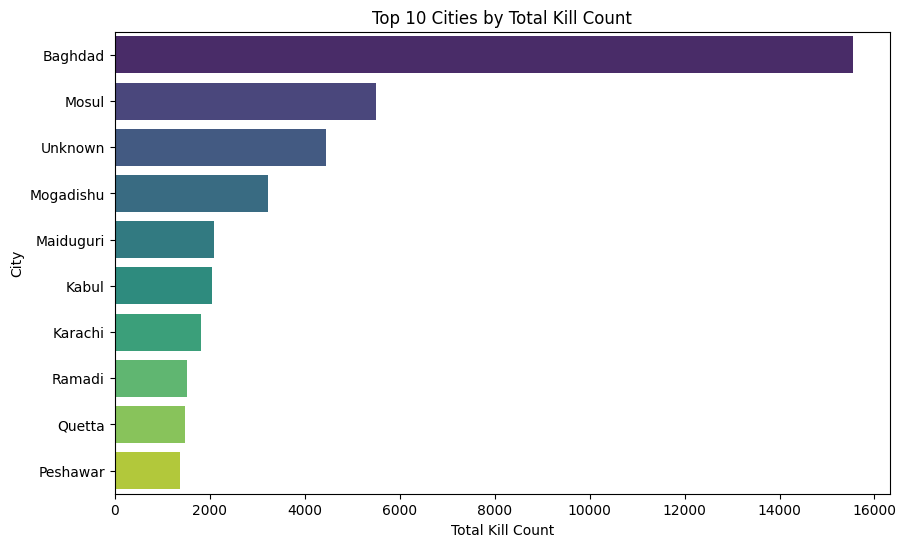

In [23]:
by_city = data[data['city'] != ''] \
    .groupby('city') \
    .agg(nkill=('nkill', 'sum')) \
    .reset_index() \
    .sort_values('nkill', ascending=False) \
    .head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=by_city, x='nkill', y='city', palette='viridis')
plt.xlabel('Total Kill Count')
plt.ylabel('City')
plt.title('Top 10 Cities by Total Kill Count')
plt.show()

C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\3707347671.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_region, x='nkill', y='region', palette='viridis')


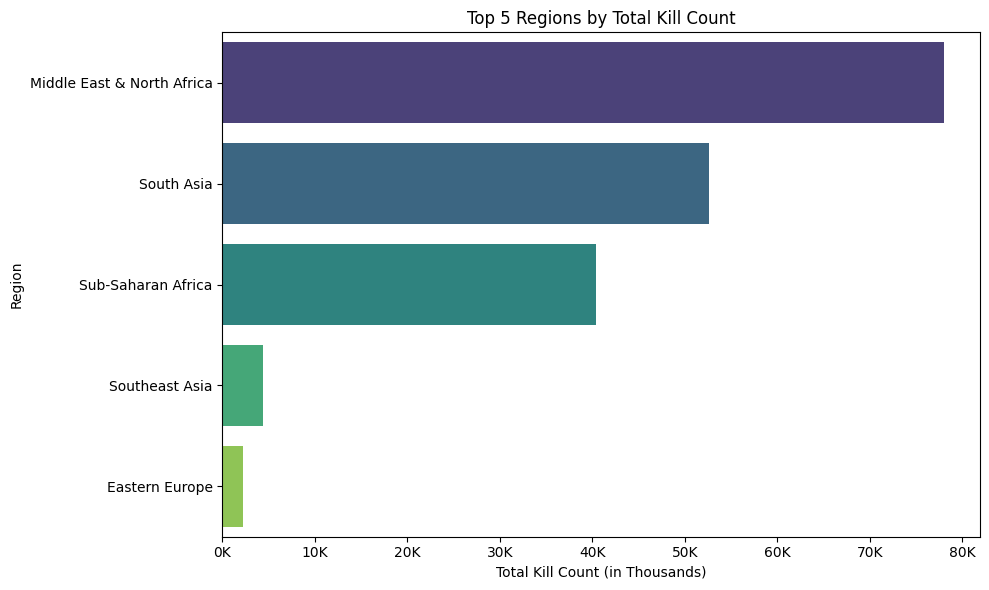

In [24]:
from matplotlib.ticker import FuncFormatter

# Group by region and calculate total kills
by_region = data.groupby('region') \
    .agg(nkill=('nkill', 'sum')) \
    .reset_index() \
    .sort_values('nkill', ascending=False) \
    .head(5)

# Plot with scaling for better readability
plt.figure(figsize=(10, 6))
sns.barplot(data=by_region, x='nkill', y='region', palette='viridis')

# Format x-axis labels to show 'K' for thousands
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1000:.0f}K'))

# Add axis labels and title
plt.xlabel('Total Kill Count (in Thousands)')
plt.ylabel('Region')
plt.title('Top 5 Regions by Total Kill Count')

plt.tight_layout()
plt.show()


C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\3684394255.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_damage = data.groupby('damage') \
C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\3684394255.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_damage, x='nkill', y='damage', palette='viridis')


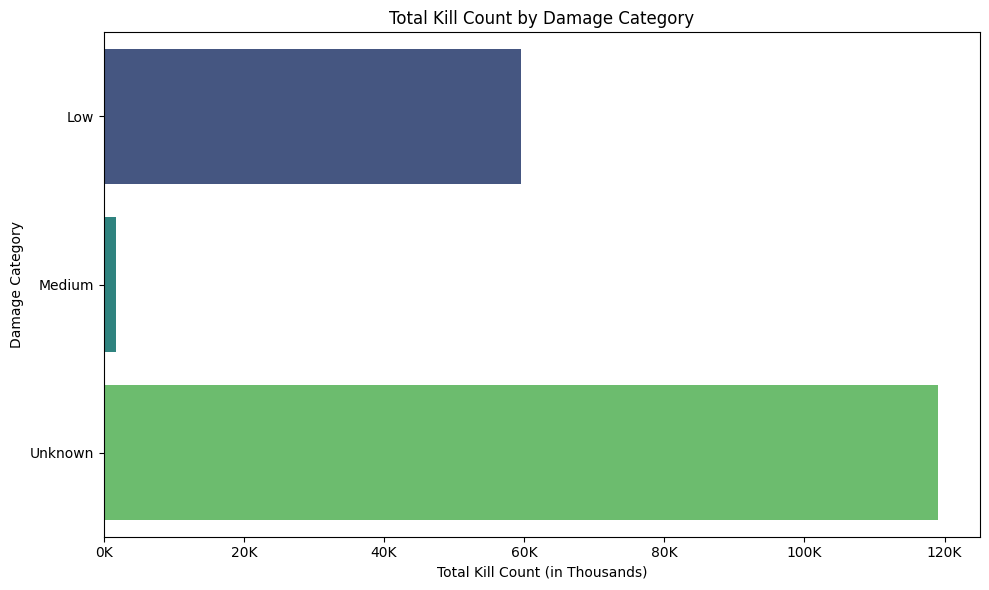

In [25]:
# Replace 'unknown' with a better label
data['damage'] = data['damage'].replace('unknown', 'Not Specified')

# Group by damage and calculate total kills
by_damage = data.groupby('damage') \
    .agg(nkill=('nkill', 'sum')) \
    .reset_index() \
    .sort_values('nkill', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=by_damage, x='nkill', y='damage', palette='viridis')

plt.xlabel('Total Kill Count (in Thousands)')
plt.ylabel('Damage Category')
plt.title('Total Kill Count by Damage Category')

# Format x-axis to show in 'K'
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x/1000:.0f}K'))

plt.tight_layout()
plt.show()


C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\1562183051.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  by_attack = data.groupby('attack') \
C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\1562183051.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_attack, x='nkill', y='attack', palette='viridis')


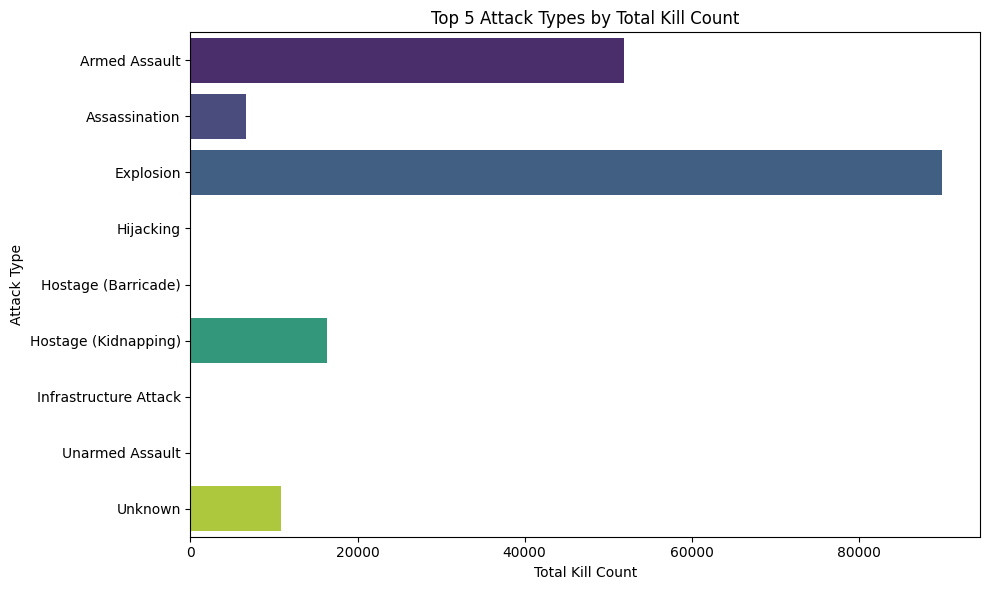

In [26]:
# Group by attack type and calculate total kills
by_attack = data.groupby('attack') \
    .agg(nkill=('nkill', 'sum')) \
    .reset_index() \
    .sort_values('nkill', ascending=False) \
    .head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=by_attack, x='nkill', y='attack', palette='viridis')

# Add labels and title
plt.xlabel('Total Kill Count')
plt.ylabel('Attack Type')
plt.title('Top 5 Attack Types by Total Kill Count')

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\2217606183.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('weapon') \
C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\2217606183.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_weapon, x='nkill', y='weapon', palette='viridis')


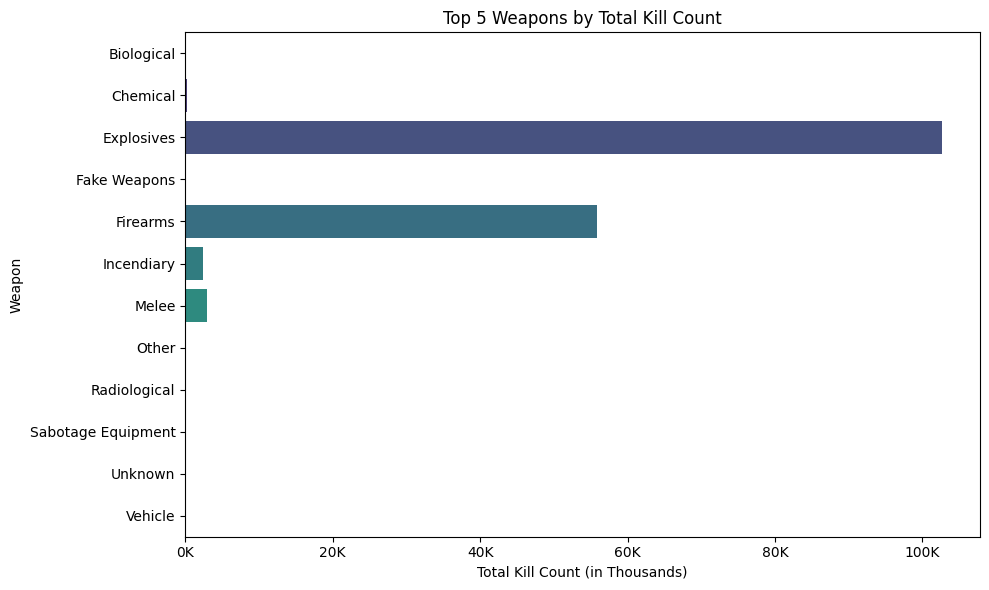

In [27]:
# Select weapon and nkill columns, filter out 'Unknown' and 'Other' weapon types
by_weapon = data[data['weapon'] != 'Unknown'] \
    .loc[data['weapon'] != 'Other', ['weapon', 'nkill']] \
    .groupby('weapon') \
    .agg(nkill=('nkill', 'sum')) \
    .reset_index() \
    .sort_values('nkill', ascending=False) \
    .head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=by_weapon, x='nkill', y='weapon', palette='viridis')

# Scaling the y-axis labels to show 'K' for thousands
plt.xlabel('Total Kill Count (in Thousands)')
plt.ylabel('Weapon')
plt.title('Top 5 Weapons by Total Kill Count')

# Format y-axis labels to display in 'K' units
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x/1000:.0f}K'))

# Display the plot
plt.tight_layout()
plt.show()


C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\1894098676.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('target') \
C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\1894098676.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=by_target, x='nkill', y='target', palette='viridis')


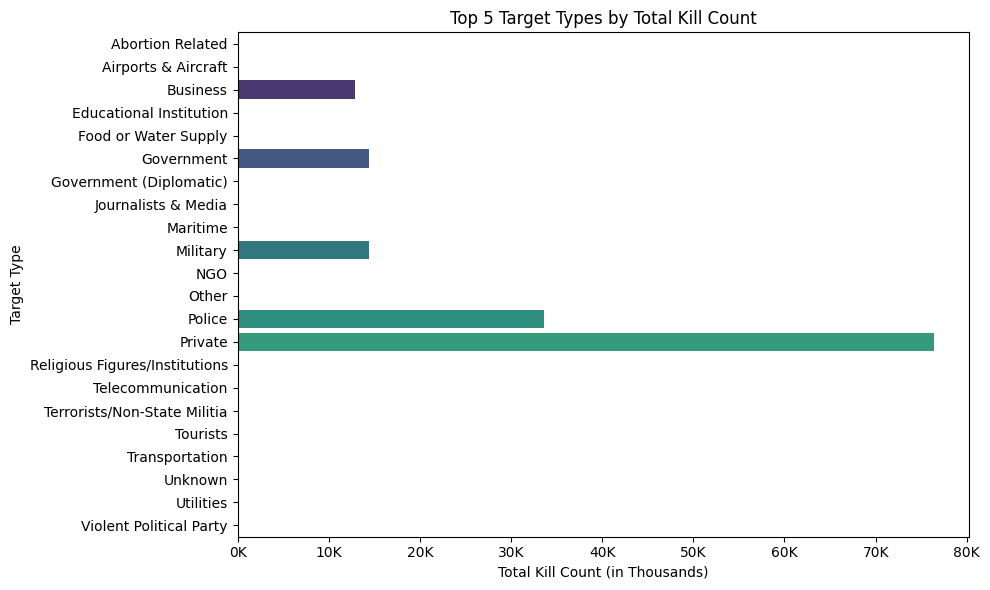

In [28]:
# Select target and nkill columns, filter out 'Unknown' target types
by_target = data[data['target'] != 'Unknown'] \
    .loc[:, ['target', 'nkill']] \
    .groupby('target') \
    .agg(nkill=('nkill', 'sum')) \
    .reset_index() \
    .sort_values('nkill', ascending=False) \
    .head(5)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=by_target, x='nkill', y='target', palette='viridis')

# Scaling the y-axis labels to show 'K' for thousands
plt.xlabel('Total Kill Count (in Thousands)')
plt.ylabel('Target Type')
plt.title('Top 5 Target Types by Total Kill Count')

# Format x-axis labels to display in 'K' units
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{x/1000:.0f}K'))

# Display the plot
plt.tight_layout()
plt.show()


In [29]:
numerical = ["nperps", "nkill", "nwound", "nkillter", "ransomamt"]

data[numerical].describe()


,nperps,nkill,nwound,nkillter,ransomamt
count,83606.000000,83606.000000,83606.000000,83606.000000,8.360600e+04
mean,3.140110,2.157369,3.211935,0.377138,1.745664e+04
std,32.115118,9.305405,14.075106,3.226812,1.340889e+06
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,1.000000,2.000000,3.000000,0.000000,0.000000e+00
max,5000.000000,953.000000,1500.000000,301.000000,2.000000e+08


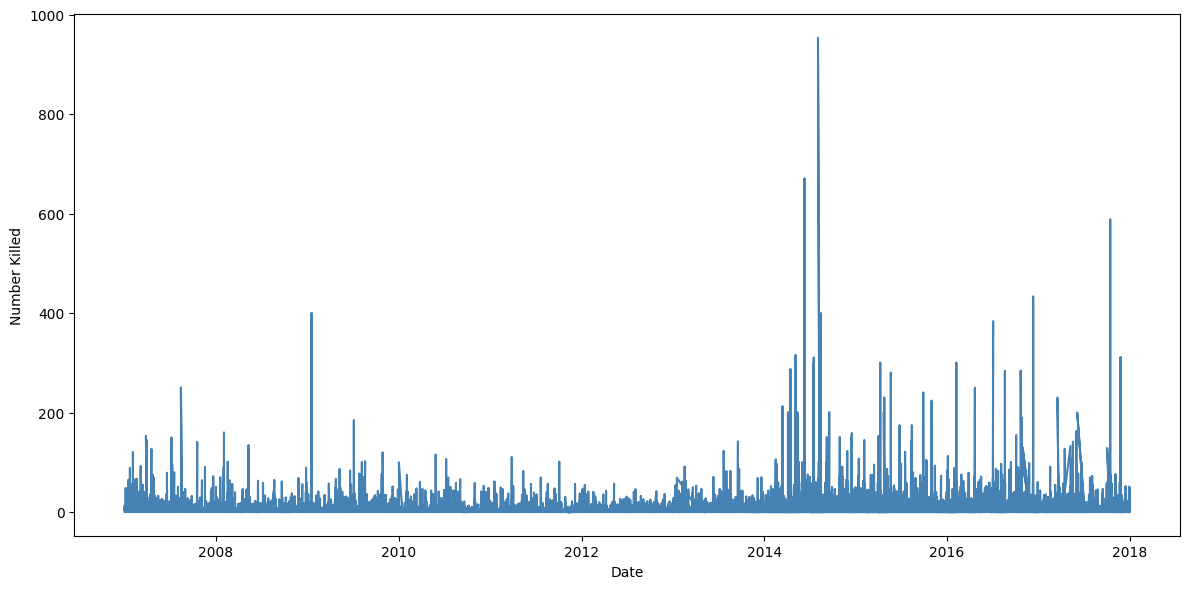

In [30]:
nkill_daily = (
    data[['date', 'nkill']]
    .copy()
    .fillna({'nkill': 0})
)
nkill_daily['nkill'] = nkill_daily['nkill'].apply(lambda x: max(x, 0))

plt.figure(figsize=(12, 6))
plt.plot(nkill_daily['date'], nkill_daily['nkill'], color='steelblue')
plt.xlabel('Date')
plt.ylabel('Number Killed')
plt.tight_layout()
plt.show()

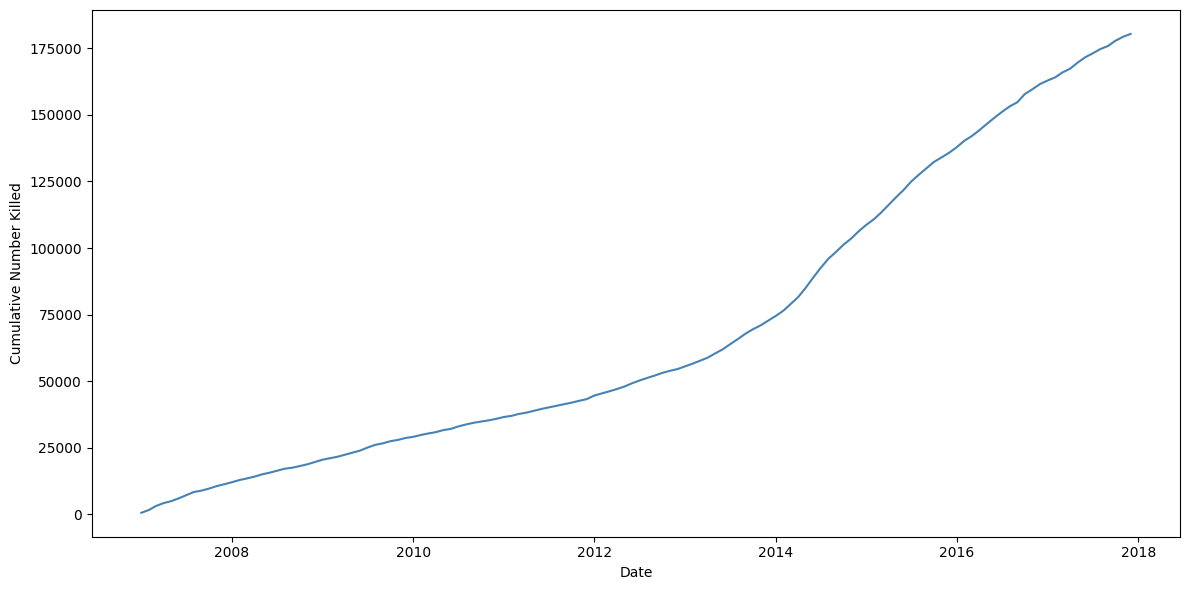

In [31]:
nkill_monthly = (
    data[['year', 'month', 'nkill']]
    .copy()
    .fillna({'nkill': 0})
)
nkill_monthly['nkill'] = nkill_monthly['nkill'].apply(lambda x: max(x, 0))

nkill_monthly = (
    nkill_monthly
    .groupby(['year', 'month'], as_index=False)
    .agg({'nkill': 'sum'})
)
nkill_monthly['date'] = pd.to_datetime(dict(year=nkill_monthly.year, month=nkill_monthly.month, day=1))
nkill_monthly['nkill'] = nkill_monthly['nkill'].cumsum()

plt.figure(figsize=(12, 6))
plt.plot(nkill_monthly['date'], nkill_monthly['nkill'], color='steelblue')
plt.xlabel('Date')
plt.ylabel('Cumulative Number Killed')
plt.tight_layout()
plt.show()

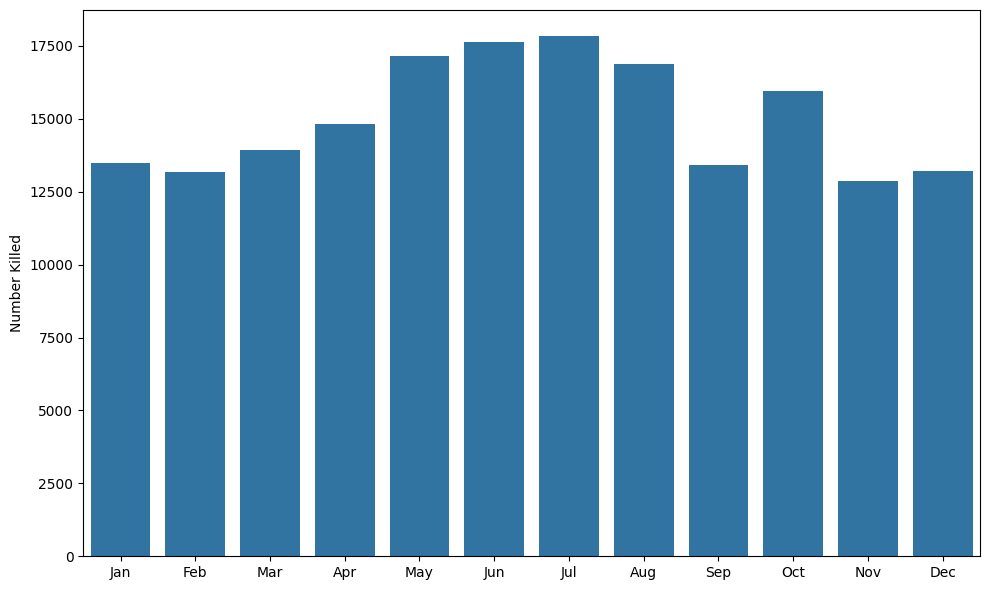

In [32]:
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

by_month = (
    data[['month', 'nkill']]
    .groupby('month', as_index=False)
    .agg(nkill=('nkill', 'sum'))
)
by_month['monthname'] = by_month['month'].apply(lambda x: calendar.month_abbr[x])

plt.figure(figsize=(10, 6))
sns.barplot(data=by_month, x='monthname', y='nkill', order=[calendar.month_abbr[i] for i in range(1, 13)])
plt.xlabel('')
plt.ylabel('Number Killed')
plt.tight_layout()
plt.show()


C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\2910943994.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'month', 'weapon'], as_index=False)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use

<Figure size 1200x1600 with 0 Axes>

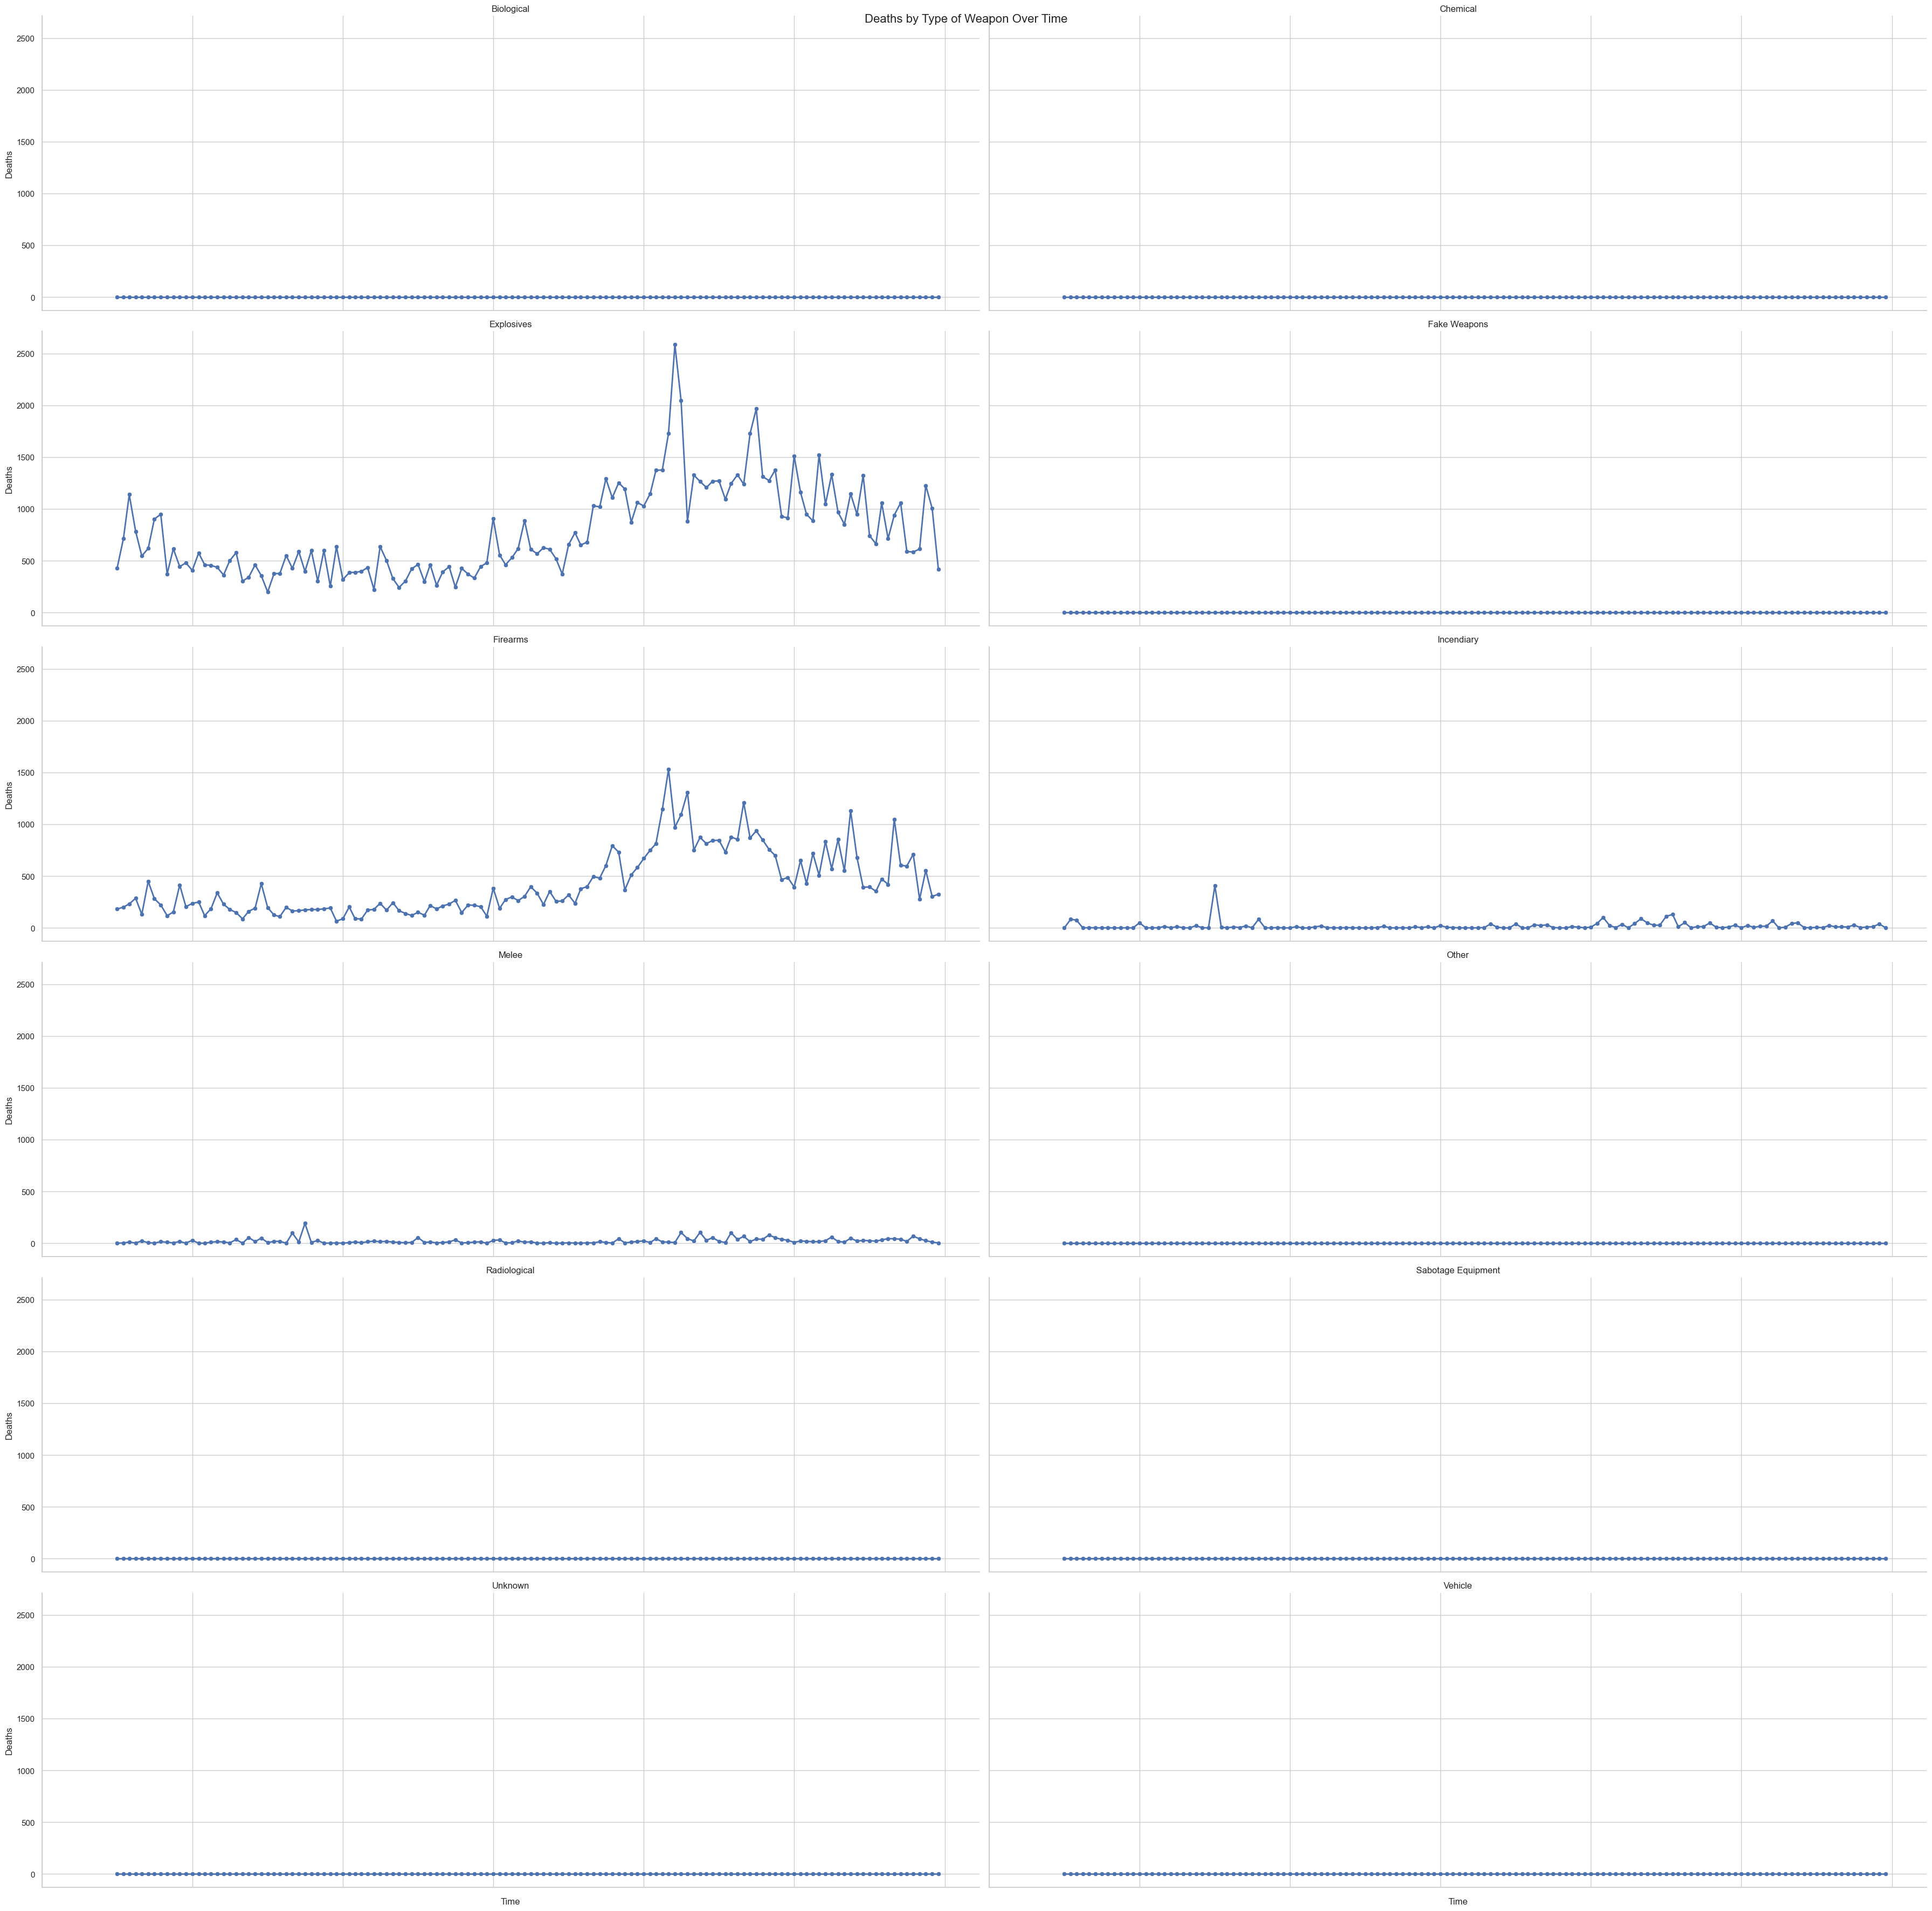

In [33]:
# Filter by specific weapon types
weapon_types = ['Explosives', 'Firearms', 'Incendiary', 'Melee']

# Prepare the data: select columns, filter by weapon types, and group by year, month, and weapon
nkill_by_weapon_monthly = (
    data[['year', 'month', 'nkill', 'weapon']]
    .query('weapon in @weapon_types')
    .groupby(['year', 'month', 'weapon'], as_index=False)
    .sum()  # Summing the 'nkill' column by year, month, and weapon
)

# Create a date column
nkill_by_weapon_monthly['date'] = pd.to_datetime(
    nkill_by_weapon_monthly['year'].astype(str) + '-' +
    nkill_by_weapon_monthly['month'].astype(str) + '-01'
)

# Plot
plt.figure(figsize=(12, 16))
sns.set(style="whitegrid")
g = sns.FacetGrid(nkill_by_weapon_monthly, col="weapon", col_wrap=2, height=6, aspect=3)
g.map(sns.scatterplot, 'date', 'nkill')
g.map(sns.lineplot, 'date', 'nkill', ci=None, lw=2)
g.set_titles("{col_name}")
g.set_axis_labels("Time", "Deaths")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Deaths by Type of Weapon Over Time", fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\613812295.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'month', 'target'], as_index=False)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use

<Figure size 1200x1600 with 0 Axes>

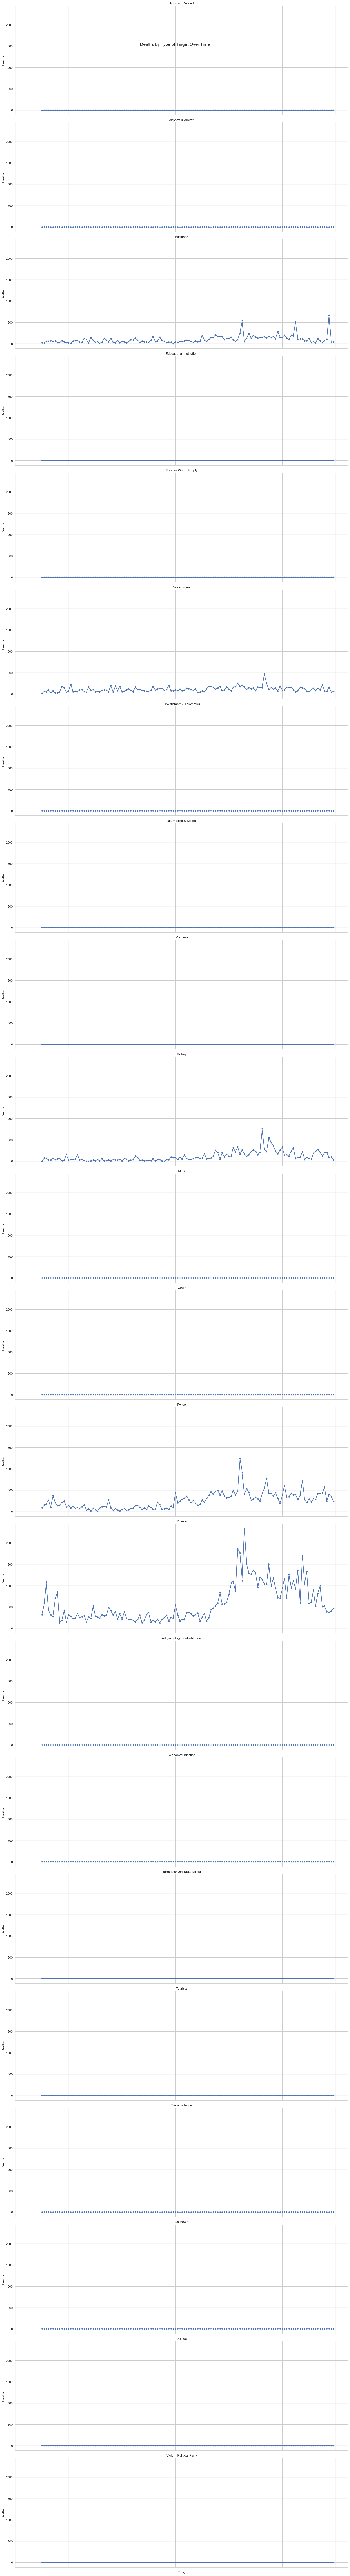

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Assuming 'by_target' is a predefined DataFrame or list with the target types
target_list = by_target['target'].tolist()

# Prepare the data
nkill_by_target_monthly = (
    data[['year', 'month', 'nkill', 'target']]
    .query('target in @target_list')
    .groupby(['year', 'month', 'target'], as_index=False)
    .sum()  # Summing the 'nkill' column by year, month, and target
)

# Create a date column
nkill_by_target_monthly['date'] = pd.to_datetime(
    nkill_by_target_monthly['year'].astype(str) + '-' +
    nkill_by_target_monthly['month'].astype(str) + '-01'
)

# Plot
plt.figure(figsize=(12, 16))
sns.set(style="whitegrid")
g = sns.FacetGrid(nkill_by_target_monthly, col="target", col_wrap=1, height=6, aspect=3)
g.map(sns.scatterplot, 'date', 'nkill')
g.map(sns.lineplot, 'date', 'nkill', ci=None, lw=2)
g.set_titles("{col_name}")
g.set_axis_labels("Time", "Deaths")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Deaths by Type of Target Over Time", fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\Chandra Shekhar\AppData\Local\Temp\ipykernel_3128\2636699205.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year', 'month', 'attack'], as_index=False)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\Chandra Shekhar\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Us

<Figure size 1200x1600 with 0 Axes>

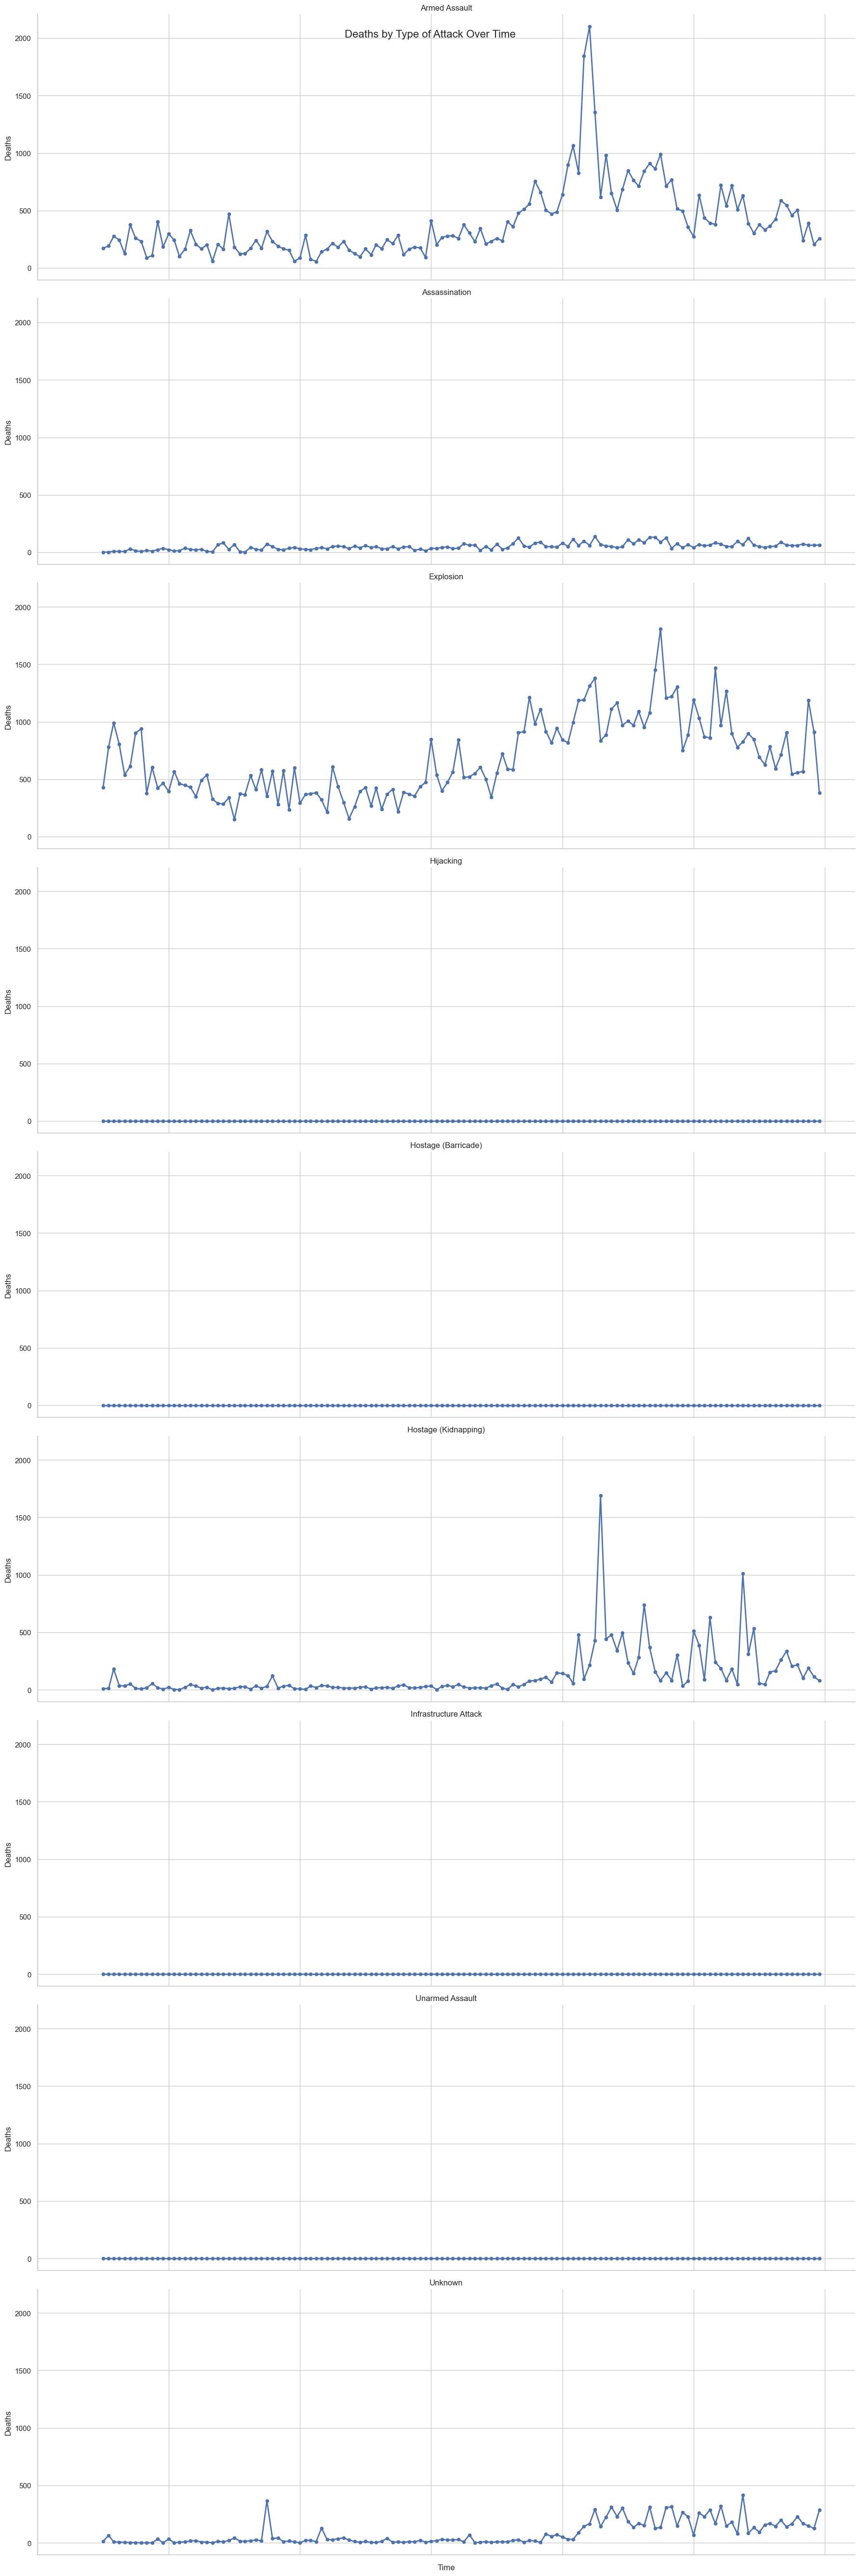

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

# Assuming 'by_attack' is a predefined DataFrame or list with the attack types
attack_list = by_attack['attack'].tolist()

# Prepare the data
nkill_by_attack_monthly = (
    data[['year', 'month', 'nkill', 'attack']]
    .query('attack in @attack_list')
    .groupby(['year', 'month', 'attack'], as_index=False)
    .sum()  # Summing the 'nkill' column by year, month, and attack
)

# Create a date column
nkill_by_attack_monthly['date'] = pd.to_datetime(
    nkill_by_attack_monthly['year'].astype(str) + '-' +
    nkill_by_attack_monthly['month'].astype(str) + '-01'
)

# Plot
plt.figure(figsize=(12, 16))
sns.set(style="whitegrid")
g = sns.FacetGrid(nkill_by_attack_monthly, col="attack", col_wrap=1, height=6, aspect=3)
g.map(sns.scatterplot, 'date', 'nkill')
g.map(sns.lineplot, 'date', 'nkill', ci=None, lw=2)
g.set_titles("{col_name}")
g.set_axis_labels("Time", "Deaths")
g.set_xticklabels(rotation=45)
plt.subplots_adjust(top=0.95)
g.fig.suptitle("Deaths by Type of Attack Over Time", fontsize=16)
plt.tight_layout()
plt.show()



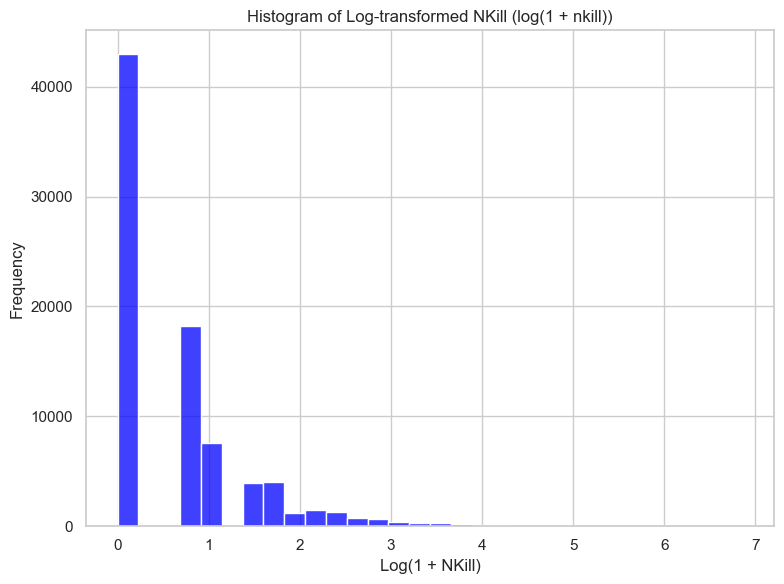

In [38]:
# Applying the log transformation to 'nkill' and adding 1
data['log_nkill'] = np.log(1 + data['nkill'])

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['log_nkill'], bins=30, kde=False, color="blue")

# Adding titles and labels
plt.title("Histogram of Log-transformed NKill (log(1 + nkill))")
plt.xlabel("Log(1 + NKill)")
plt.ylabel("Frequency")

# Customizing the theme (same as theme_custom in R)
sns.set(style="whitegrid")  # You can add more style customizations here
plt.tight_layout()
plt.show()

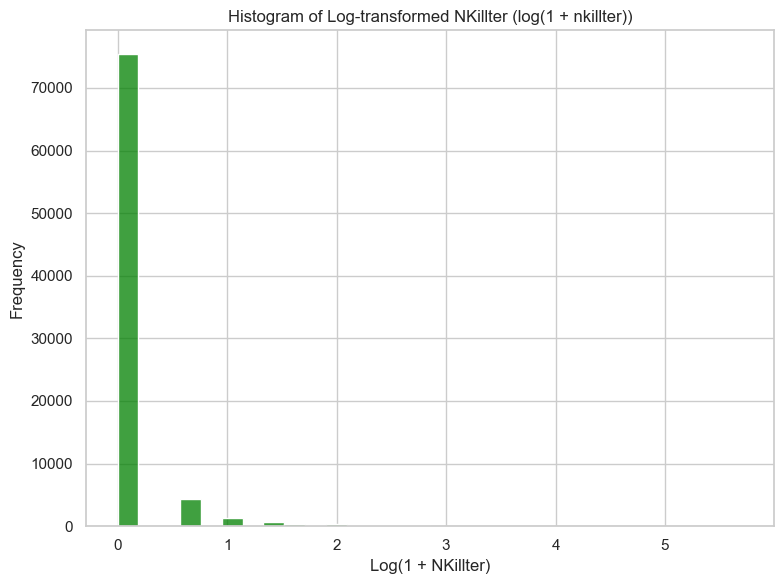

In [39]:
# Apply log transformation to 'nkillter' and add 1
data['log_nkillter'] = np.log(1 + data['nkillter'])

# Plotting the histogram
plt.figure(figsize=(8, 6))
sns.histplot(data['log_nkillter'], bins=30, kde=False, color="green")

# Adding titles and labels
plt.title("Histogram of Log-transformed NKillter (log(1 + nkillter))")
plt.xlabel("Log(1 + NKillter)")
plt.ylabel("Frequency")

# Customizing the theme (similar to 'theme_custom' in R)
sns.set(style="whitegrid")  # Adjust to match your custom theme
plt.tight_layout()
plt.show()

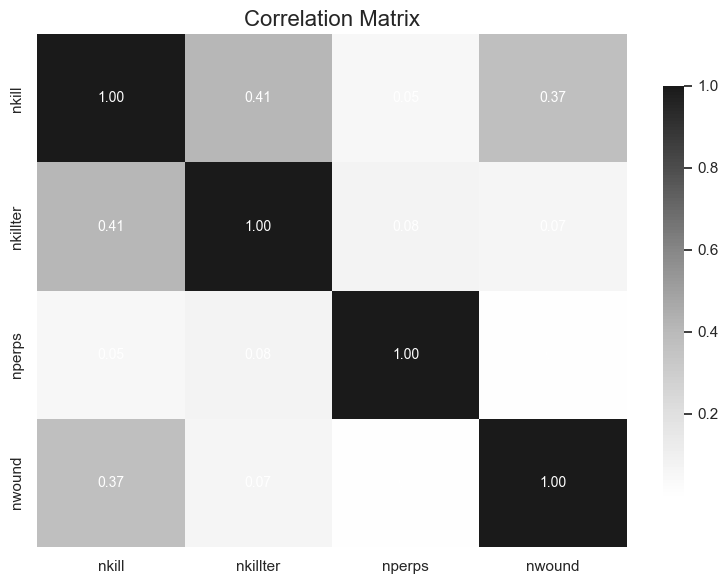

In [40]:
# Selecting relevant columns and removing rows with missing values
data_selected = data[['nkill', 'nkillter', 'nperps', 'nwound']].dropna()

# Calculating the correlation matrix
C = data_selected.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(C, annot=True, cmap="RdGy", center=0, 
            annot_kws={'size': 10, 'color': 'white'}, 
            cbar_kws={'shrink': 0.8}, fmt=".2f")

# Adding titles and labels
plt.title("Correlation Matrix", fontsize=16)
plt.tight_layout()
plt.show()


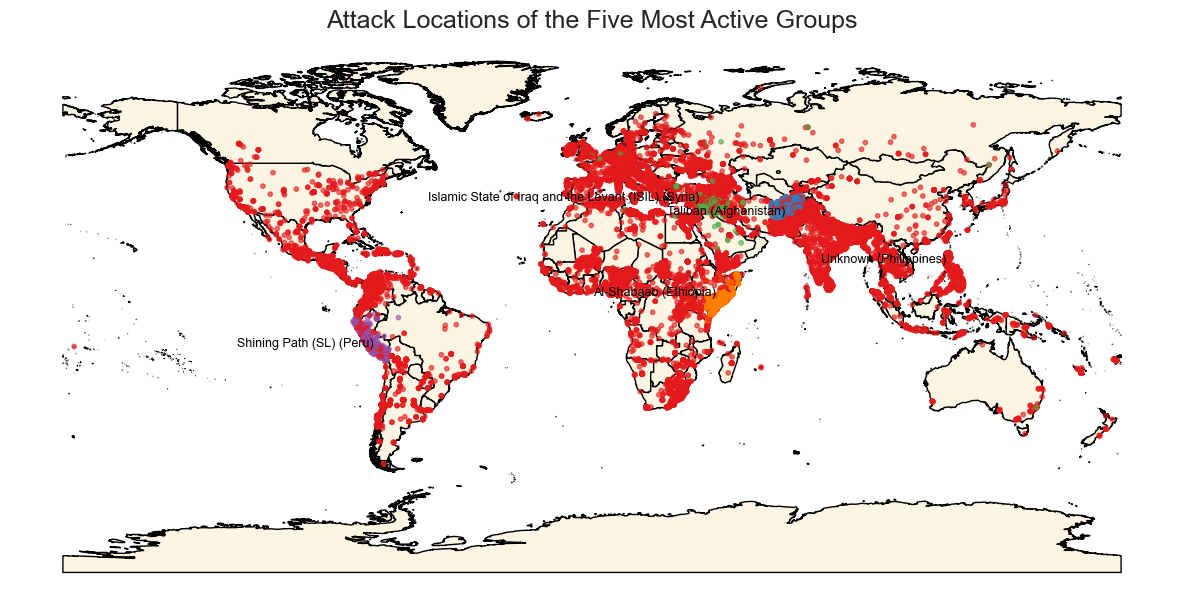

In [43]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import warnings

warnings.filterwarnings("ignore")

# Load terrorism data
data = pd.read_csv("C:/Users/Chandra Shekhar/Downloads/globalterrorismdb_0718dist.csv", encoding='latin1')

# Clean missing coordinates
data = data.dropna(subset=["latitude", "longitude"])

# Get top 5 most active groups
top_groups = data["gname"].value_counts().head(5).index.tolist()

# Filter data for top 5 groups
attacks = data[data["gname"].isin(top_groups)].copy()

# Rename for clarity
attacks.rename(columns={"latitude": "lat", "longitude": "long"}, inplace=True)

# Convert to GeoDataFrame
attacks_gdf = gpd.GeoDataFrame(
    attacks,
    geometry=gpd.points_from_xy(attacks["long"], attacks["lat"]),
    crs="EPSG:4326"
)

# Load world map
world = gpd.read_file("C:/Users/Chandra Shekhar/Downloads/ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")

# Prepare annotation data: one location per group
location = attacks.groupby("gname").first().reset_index()
location["full_gname_ctry"] = location["gname"] + " (" + location["country_txt"] + ")"

# Create consistent color mapping
group_to_color = dict(zip(top_groups, sns.color_palette("Set1", n_colors=5)))

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color="#FDF5E3", edgecolor="black")

# Scatter plot of attacks
ax.scatter(
    attacks_gdf.geometry.x,
    attacks_gdf.geometry.y,
    c=attacks_gdf["gname"].map(group_to_color),
    alpha=0.6,
    s=10
)

# Add text annotations
for _, row in location.iterrows():
    ax.text(
        row["long"],
        row["lat"],
        row["full_gname_ctry"],
        fontsize=9,
        ha='right',
        color='black'
    )

ax.set_title("Attack Locations of the Five Most Active Groups", fontsize=18)
ax.set_axis_off()
plt.tight_layout()
plt.show()
